In [ ]:
import networkx as nx
import pickle
import community

Read pickle file and store it in G as a graph

In [ ]:
with open('bigger_graph.pickle', 'rb') as f:
    G = pickle.load(f)

In [ ]:
G

In [ ]:
nx.closeness_centrality(G)

Save graph in csv file (to be used in Gephi):

In [11]:
nx.write_edgelist(G, "big.csv", data=False, delimiter=",")

Draw graph with spring layout:

In [12]:
pos = nx.spring_layout(G)

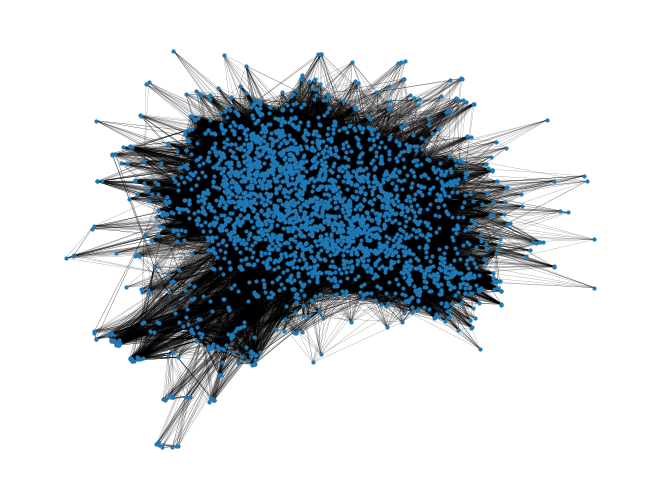

In [13]:
nx.draw(G,pos=pos,node_size=4,width=0.1)

Calculate closeness centrality:

In [5]:
partition = community.best_partition(G,resolution=0.75)

# Print the modularity score
print("Modularity:", community.modularity(partition, G))

# Print the communities
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = [node]
    else:
        communities[community_id].append(node)

for community_id, nodes in communities.items():
    print("Community", community_id, ":", nodes)

Modularity: 0.4148331984881175
Community 4 : ['spotify:track:000xQL6tZNLJzIrtIgxqSl', 'spotify:track:00lNx0OcTJrS3MKHcB80HY', 'spotify:track:0dA2Mk56wEzDgegdC6R17g', 'spotify:track:0gbBzIqrECJOEPvQJIBFs5', 'spotify:track:0wfbD5rAksdXUzRvMfM3x5', 'spotify:track:104buTcnP2AsxqB7U1FIZ4', 'spotify:track:1Eck97uRMlprKOOJN9oO1E', 'spotify:track:1louJpMmzEicAn7lzDalPW', 'spotify:track:1x5sYLZiu9r5E43kMlt9f8', 'spotify:track:21TdkDRXuAB3k90ujRU1et', 'spotify:track:2pJZ1v8HezrAoZ0Fhzby92', 'spotify:track:3SGWp9fJCzgK0WcpcKSQdy', 'spotify:track:3WRQUvzRvBDr4AxMWhXc5E', 'spotify:track:3eR23VReFzcdmS7TYCrhCe', 'spotify:track:5GXAXm5YOmYT0kL5jHvYBt', 'spotify:track:6RUKPb4LETWmmr3iAEQktW', 'spotify:track:6jA8HL9i4QGzsj6fjoxp8Y', 'spotify:track:6kex4EBAj0WHXDKZMEJaaF', 'spotify:track:7i2DJ88J7jQ8K7zqFX2fW8', 'spotify:track:1D3ODoXHBLpdxolZRHWV1j', 'spotify:track:1oew3nFNY3vMacJAsvry0S', 'spotify:track:2DVUJ7LTIOEQqjfOZXs8iU', 'spotify:track:2QbFClFyhMMtiurUjuQlAe', 'spotify:track:2nMeu6UenVvwUktBCpL

### Using Spotify API
Once you have followed the steps given in the QM+ forum (i.e., setting up Spotify Developer account, getting credentials and setting them as environmental variables, you should be able to run the following code:

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id='ba7f324f6d9a47088d10804cdcc6655b', client_secret='536614fbe9ef4a8ab129bed73af0210c')
spotify = spotipy.Spotify(client_credentials_manager = client_credentials_manager)


In [25]:
tracks = "spotify:track:4P6BuLsqtg5uISdE77ypI9"
artist = spotify.track(track)["artists"][0]["id"]
track_name = spotify.track(track)["name"]
artist_pop = tracks['popularity']
artist_genres = spotify.artist(artist)["genres"]
danceability = spotify.audio_features(track)[0]['danceability']
print (track_name,danceability,artist_pop,artist_genres)



TypeError: expected string or bytes-like object

In [27]:
track = spotify.track("spotify:track:4P6BuLsqtg5uISdE77ypI9")
popularity = track["popularity"]
print(popularity)

67


In [22]:
spotify.audio_features("spotify:track:4JWZTNlLBlNoa5t7qn1M8i")


[{'danceability': 0.792,
  'energy': 0.647,
  'key': 4,
  'loudness': -8.314,
  'mode': 1,
  'speechiness': 0.045,
  'acousticness': 0.255,
  'instrumentalness': 0.000223,
  'liveness': 0.132,
  'valence': 0.694,
  'tempo': 102.477,
  'type': 'audio_features',
  'id': '4JWZTNlLBlNoa5t7qn1M8i',
  'uri': 'spotify:track:4JWZTNlLBlNoa5t7qn1M8i',
  'track_href': 'https://api.spotify.com/v1/tracks/4JWZTNlLBlNoa5t7qn1M8i',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4JWZTNlLBlNoa5t7qn1M8i',
  'duration_ms': 209547,
  'time_signature': 4}]

In [ ]:
A = list(G.nodes())[0:500]

In [ ]:
for elem in A:
    print(spotify.audio_features(elem)[0]["danceability"])

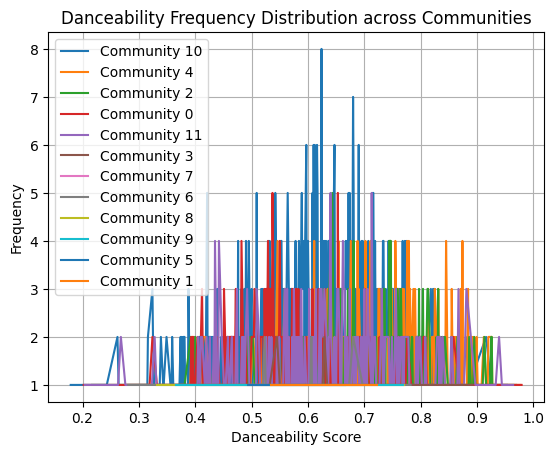

In [4]:
import networkx as nx
import pickle
import spotipy
import community
import time
import matplotlib.pyplot as plt
from spotipy.oauth2 import SpotifyClientCredentials

# Load the graph from the pickle file
with open('bigger_graph.pickle', 'rb') as f:
    G = pickle.load(f)

# Spotify API setup
client_credentials_manager = SpotifyClientCredentials(client_id='ba7f324f6d9a47088d10804cdcc6655b', client_secret='536614fbe9ef4a8ab129bed73af0210c')
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Perform Louvain community detection
partition = community.best_partition(G, resolution=0.75)

# Organize nodes into communities
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = [node]
    else:
        communities[community_id].append(node)

# Dictionary to store danceability scores for each community
community_danceability = {}

# Iterate through all communities to fetch and store danceability
for community_id, nodes in communities.items():
    danceability_scores = []
    
    # Fetch and store danceability for nodes within the community in batches
    for i in range(0, len(nodes), 100):
        batch = nodes[i:i+100]
        try:
            # Fetch audio features for the batch
            audio_features_list = spotify.audio_features(batch)
            for audio_features in audio_features_list:
                if audio_features:  # Check if audio features were successfully retrieved
                    danceability = audio_features['danceability']
                    danceability_scores.append(danceability)
            time.sleep(30)  # Delay for 30 seconds between each batch request
        except spotipy.SpotifyException as e:
            print(f"Failed to fetch audio features for batch starting with track {batch[0] if batch else 'N/A'}: {e}")

    # Store danceability scores for the community
    community_danceability[community_id] = danceability_scores

# Calculate average frequency of danceability scores for each community
community_avg_danceability = {}
for community_id, danceability_scores in community_danceability.items():
    avg_danceability = sum(danceability_scores) / len(danceability_scores)
    community_avg_danceability[community_id] = avg_danceability

# Plot the line chart
plt.figure(figsize=(20, 12))
for community_id, avg_danceability in community_avg_danceability.items():
    plt.plot(avg_danceability, label=f'Community {community_id}')

plt.title("Average Danceability Score across Communities")
plt.xlabel("Danceability Score")
plt.ylabel("Average Frequency")
plt.legend()
plt.grid()
plt.show()



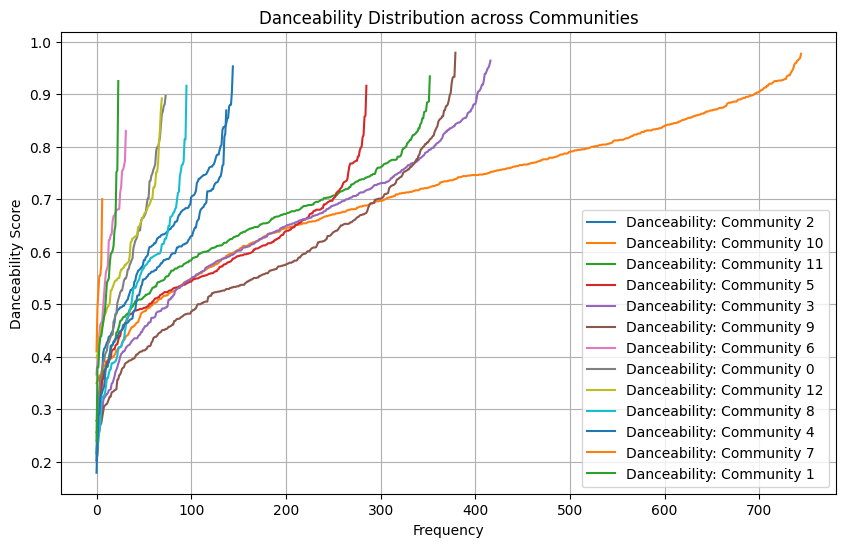

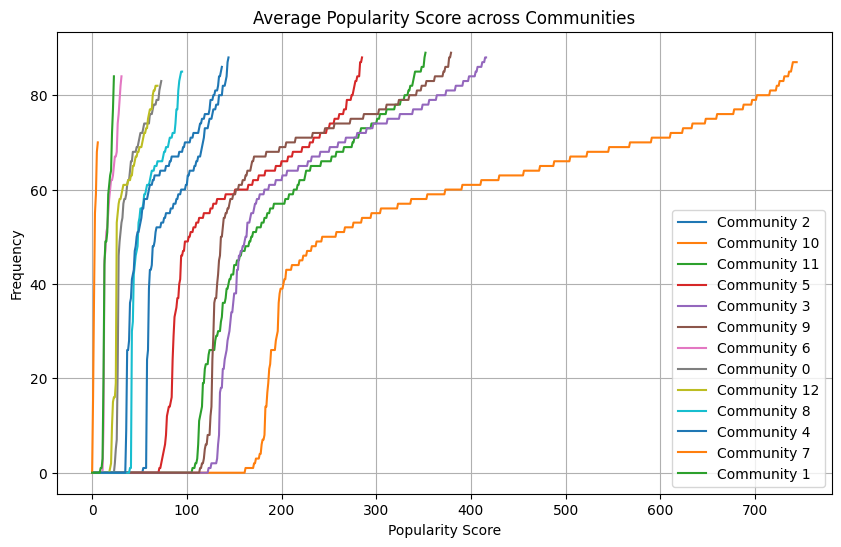

In [2]:
import networkx as nx
import pickle
import spotipy
import community
import time
import matplotlib.pyplot as plt
from spotipy.oauth2 import SpotifyClientCredentials

# Load the graph from the pickle file
with open('bigger_graph.pickle', 'rb') as f:
    G = pickle.load(f)

# Spotify API setup
client_credentials_manager = SpotifyClientCredentials(client_id='ba7f324f6d9a47088d10804cdcc6655b', client_secret='536614fbe9ef4a8ab129bed73af0210c')
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Perform Louvain community detection
partition = community.best_partition(G, resolution=0.8)

# Organize nodes into communities
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = [node]
    else:
        communities[community_id].append(node)

# Dictionary to store danceability scores for each community
community_danceability = {}

# Iterate through all communities to fetch and store danceability
for community_id, nodes in communities.items():
    danceability_scores = []
    
    # Fetch and store danceability for nodes within the community in batches
    for i in range(0, len(nodes), 100):
        batch = nodes[i:i+100]
        try:
            # Fetch audio features for the batch
            audio_features_list = spotify.audio_features(batch)
            for audio_features in audio_features_list:
                if audio_features:  # Check if audio features were successfully retrieved
                    danceability = audio_features['danceability']
                    danceability_scores.append(danceability)
            time.sleep(30)  # Delay for 30 seconds between each batch request
        except spotipy.SpotifyException as e:
            print(f"Failed to fetch audio features for batch starting with track {batch[0] if batch else 'N/A'}: {e}")

    # Store danceability scores for the community
    community_danceability[community_id] = danceability_scores

# Plot the danceability graph for each community
plt.figure(figsize=(10, 6))
for community_id, danceability_scores in community_danceability.items():
    # Sort the danceability scores
    sorted_scores = sorted(danceability_scores)
    # Plot the line
    plt.plot(sorted_scores, label=f'Danceability: Community {community_id}')

plt.title("Danceability Distribution across Communities")
plt.xlabel("Frequency")
plt.ylabel("Danceability Score")
plt.legend()
plt.grid()

# Dictionary to store popularity scores for each community
community_popularity = {}

# Iterate through all communities to fetch and store popularity
for community_id, nodes in communities.items():
    popularity_scores = []
    
    # Fetch and store popularity for nodes within the community in batches
    for i in range(0, len(nodes), 50):
        batch = nodes[i:i+50]
        try:
            # Fetch track information for the batch
            tracks = spotify.tracks(batch)
            for track in tracks['tracks']:
                popularity = track['popularity']
                popularity_scores.append(popularity)
            time.sleep(30)  # Delay for 30 seconds between each batch request
        except spotipy.SpotifyException as e:
            print(f"Failed to fetch track information for batch starting with track {batch[0] if batch else 'N/A'}: {e}")

    # Store popularity scores for the community
    community_popularity[community_id] = popularity_scores

# Plot the line graph with different colored lines for each community
plt.figure(figsize=(10, 6))
for community_id, popularity_scores in community_popularity.items():
    # Sort the popularity scores
    sorted_scores = sorted(popularity_scores)
    # Plot the line
    plt.plot(sorted_scores, label=f'Community {community_id}')

plt.title("Average Popularity Score across Communities")
plt.xlabel("Popularity Score")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()


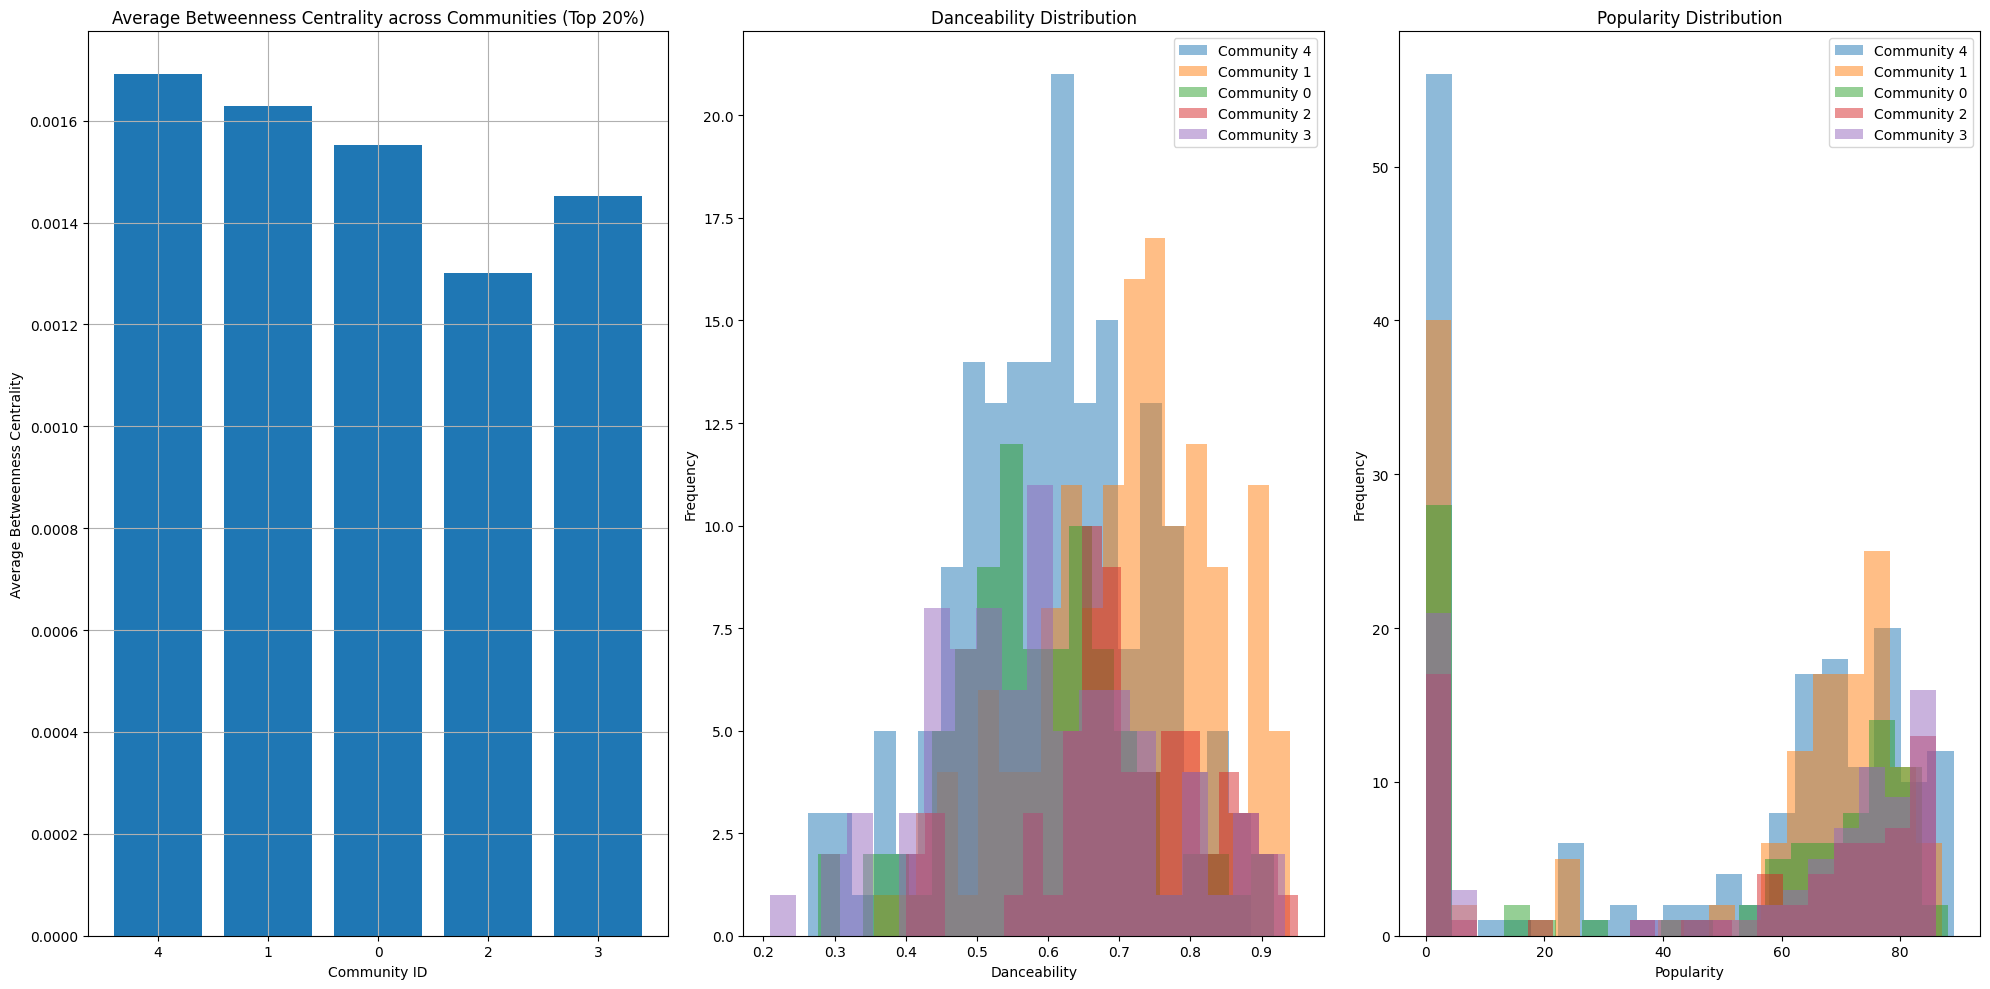

In [4]:
import networkx as nx
import pickle
import spotipy
import community
import time
import matplotlib.pyplot as plt
from spotipy.oauth2 import SpotifyClientCredentials

# Load the graph from the pickle file
with open('bigger_graph.pickle', 'rb') as f:
    G = pickle.load(f)

# Spotify API setup
client_credentials_manager = SpotifyClientCredentials(client_id='ba7f324f6d9a47088d10804cdcc6655b', client_secret='536614fbe9ef4a8ab129bed73af0210c')
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Calculate betweenness centrality for all nodes in the graph
betweenness_centralities = nx.betweenness_centrality(G)

# Get the top 20% of influential nodes based on betweenness centrality
top_nodes = sorted(betweenness_centralities.items(), key=lambda x: x[1], reverse=True)[:int(0.2 * len(G))]

# Extract nodes from the top nodes
top_nodes = [node[0] for node in top_nodes]

# Create a subgraph containing only the top nodes and their edges
subgraph = G.subgraph(top_nodes)

# Perform Louvain community detection on the subgraph
partition = community.best_partition(subgraph, resolution=0.8)

# Organize nodes into communities
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = [node]
    else:
        communities[community_id].append(node)

# Dictionary to store danceability scores for each community
community_danceability = {}

# Iterate through all communities to fetch and store danceability
for community_id, nodes in communities.items():
    danceability_scores = []
    for i in range(0, len(nodes), 100):
        batch = nodes[i:i+100]
        try:
            audio_features_list = spotify.audio_features(batch)
            for audio_features in audio_features_list:
                if audio_features:
                    danceability = audio_features['danceability']
                    danceability_scores.append(danceability)
            time.sleep(30)  # Adjust based on your actual rate limit status
        except spotipy.SpotifyException as e:
            print(f"Failed to fetch audio features for batch starting with track {batch[0] if batch else 'N/A'}: {e}")
    community_danceability[community_id] = danceability_scores

# Dictionary to store popularity scores for each community
community_popularity = {}

# Iterate through all communities to fetch and store popularity
for community_id, nodes in communities.items():
    popularity_scores = []
    for i in range(0, len(nodes), 50):
        batch = nodes[i:i+50]
        try:
            tracks = spotify.tracks(batch)
            for track in tracks['tracks']:
                popularity = track['popularity']
                popularity_scores.append(popularity)
            time.sleep(30)  # Adjust based on your actual rate limit status
        except spotipy.SpotifyException as e:
            print(f"Failed to fetch track information for batch starting with track {batch[0] if batch else 'N/A'}: {e}")
    community_popularity[community_id] = popularity_scores

# Calculate the average betweenness centrality for each community
average_betweenness_centralities = {}
for community_id, nodes in communities.items():
    avg_centrality = sum(betweenness_centralities[node] for node in nodes) / len(nodes)
    average_betweenness_centralities[community_id] = avg_centrality

# Plotting
plt.figure(figsize=(20, 10))

# Plotting Average Betweenness Centrality
plt.subplot(1, 3, 1)
plt.bar(range(len(average_betweenness_centralities)), average_betweenness_centralities.values(), align='center')
plt.xticks(range(len(average_betweenness_centralities)), list(average_betweenness_centralities.keys()))
plt.title("Average Betweenness Centrality across Communities (Top 20%)")
plt.xlabel("Community ID")
plt.ylabel("Average Betweenness Centrality")
plt.grid()

# Plotting Danceability
plt.subplot(1, 3, 2)
for community_id, danceability_scores in community_danceability.items():
    plt.hist(danceability_scores, bins=20, alpha=0.5, label=f'Community {community_id}')
plt.title('Danceability Distribution')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.legend()

# Plotting Popularity
plt.subplot(1, 3, 3)
for community_id, popularity_scores in community_popularity.items():
    plt.hist(popularity_scores, bins=20, alpha=0.5, label=f'Community {community_id}')
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()




KeyboardInterrupt: 

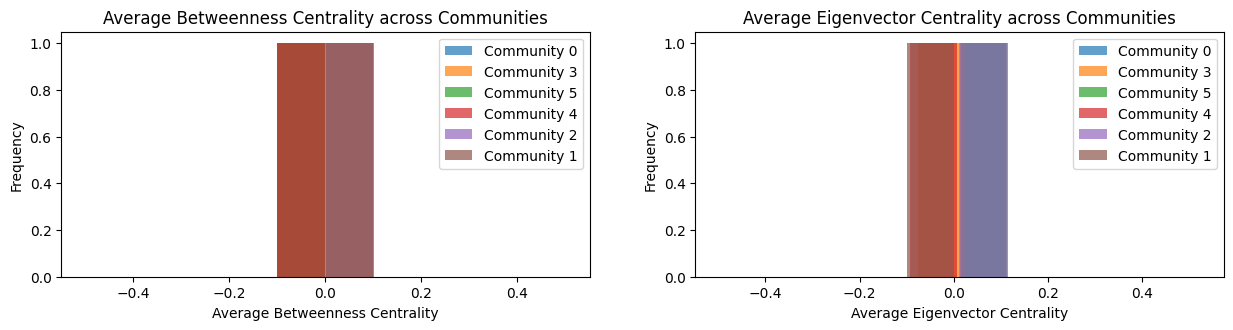

In [11]:
import networkx as nx
import pickle
import spotipy
import community
import time
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from spotipy.oauth2 import SpotifyClientCredentials

# Load the graph from the pickle file
with open('bigger_graph.pickle', 'rb') as f:
    G = pickle.load(f)

# Spotify API setup
client_credentials_manager = SpotifyClientCredentials(client_id='ba7f324f6d9a47088d10804cdcc6655b', client_secret='536614fbe9ef4a8ab129bed73af0210c')
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Perform Louvain community detection on the graph
partition = community.best_partition(G)

# Organize nodes into communities
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = [node]
    else:
        communities[community_id].append(node)

# Calculate the average betweenness centrality for each community
average_betweenness_centralities = {}
for community_id, nodes in communities.items():
    avg_centrality = sum(nx.betweenness_centrality_subset(G, nodes, G.nodes(), normalized=True).values()) / len(nodes)
    average_betweenness_centralities[community_id] = avg_centrality

# Calculate the average eigenvector centrality for each community
average_eigenvector_centralities = {}
eigenvector_centralities = nx.eigenvector_centrality(G)

for community_id, nodes in communities.items():
    avg_centrality = sum(eigenvector_centralities[node] for node in nodes) / len(nodes)
    average_eigenvector_centralities[community_id] = avg_centrality

# Dictionary to store danceability scores for each community
community_danceability = {}

# Iterate through all communities to fetch and store danceability
for community_id, nodes in communities.items():
    danceability_scores = []
    for i in range(0, len(nodes), 100):
        batch = nodes[i:i+100]
        try:
            audio_features_list = spotify.audio_features(batch)
            for audio_features in audio_features_list:
                if audio_features:
                    danceability = audio_features['danceability']
                    danceability_scores.append(danceability)
            time.sleep(30)  # Adjust based on your actual rate limit status
        except spotipy.SpotifyException as e:
            print(f"Failed to fetch audio features for batch starting with track {batch[0] if batch else 'N/A'}: {e}")
    community_danceability[community_id] = danceability_scores

# Dictionary to store popularity scores for each community
community_popularity = {}

# Iterate through all communities to fetch and store popularity
for community_id, nodes in communities.items():
    popularity_scores = []
    for i in range(0, len(nodes), 50):
        batch = nodes[i:i+50]
        try:
            tracks = spotify.tracks(batch)
            for track in tracks['tracks']:
                popularity = track['popularity']
                if popularity > 0:  # Filter out tracks with popularity 0
                    popularity_scores.append(popularity)
            time.sleep(30)  # Adjust based on your actual rate limit status
        except spotipy.SpotifyException as e:
            print(f"Failed to fetch track information for batch starting with track {batch[0] if batch else 'N/A'}: {e}")
    community_popularity[community_id] = popularity_scores

# Plotting
plt.figure(figsize=(15, 7))

# Plotting Average Betweenness Centrality
plt.subplot(2, 2, 1)
bin_size = 10
alpha = 0.7
for community_id, centrality in average_betweenness_centralities.items():
    plt.hist(centrality, bins=bin_size, alpha=alpha, label=f'Community {community_id}')
plt.title("Average Betweenness Centrality across Communities")
plt.xlabel("Average Betweenness Centrality")
plt.ylabel("Frequency")
plt.legend()

# Plotting Average Eigenvector Centrality
plt.subplot(2, 2, 2)
for community_id, centrality in average_eigenvector_centralities.items():
    plt.hist(centrality, bins=bin_size, alpha=alpha, label=f'Community {community_id}')
plt.title("Average Eigenvector Centrality across Communities")
plt.xlabel("Average Eigenvector Centrality")
plt.ylabel("Frequency")
plt.legend()

# Dictionary to store top 3 songs with highest betweenness centrality for each community
top_songs_in_communities_betweenness = {}

# Iterate through all communities to find top 3 songs with highest betweenness centrality
for community_id, nodes in communities.items():
    top_nodes = sorted(nodes, key=lambda x: nx.betweenness_centrality(G)[x], reverse=True)[:3]
    top_songs_in_communities_betweenness[community_id] = top_nodes

# Dictionary to store top 3 songs with highest eigenvector centrality for each community
top_songs_in_communities_eigenvector = {}

# Iterate through all communities to find top 3 songs with highest eigenvector centrality
for community_id, nodes in communities.items():
    top_nodes = sorted(nodes, key=lambda x: eigenvector_centralities[x], reverse=True)[:3]
    top_songs_in_communities_eigenvector[community_id] = top_nodes

# Plotting Danceability
plt.subplot(2, 2, 3)
for community_id, danceability_scores in community_danceability.items():
    density = stats.gaussian_kde(danceability_scores)
    x = np.linspace(min(danceability_scores), max(danceability_scores), 200)
    plt.plot(x, density(x), label=f'Community {community_id}')
plt.title('Danceability Distribution')
plt.xlabel('Danceability')
plt.ylabel('Density')
plt.legend()

# Plotting Popularity
plt.subplot(2, 2, 4)
for community_id, popularity_scores in community_popularity.items():
    density = stats.gaussian_kde(popularity_scores)
    x = np.linspace(min(popularity_scores), max(popularity_scores), 200)
    plt.plot(x, density(x), label=f'Community {community_id}')
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Print top 3 songs with highest betweenness centrality for each community
print("Top 3 songs by Betweenness Centrality:")
for community_id, top_songs in top_songs_in_communities_betweenness.items():
    print(f"Community {community_id}:")
    for idx, song_id in enumerate(top_songs, 1):
        print(f"  Top {idx}: {song_id}")

# Print top 3 songs with highest eigenvector centrality for each community
print("\nTop 3 songs by Eigenvector Centrality:")
for community_id, top_songs in top_songs_in_communities_eigenvector.items():
    print(f"Community {community_id}:")
    for idx, song_id in enumerate(top_songs, 1):
        print(f"  Top {idx}: {song_id}")


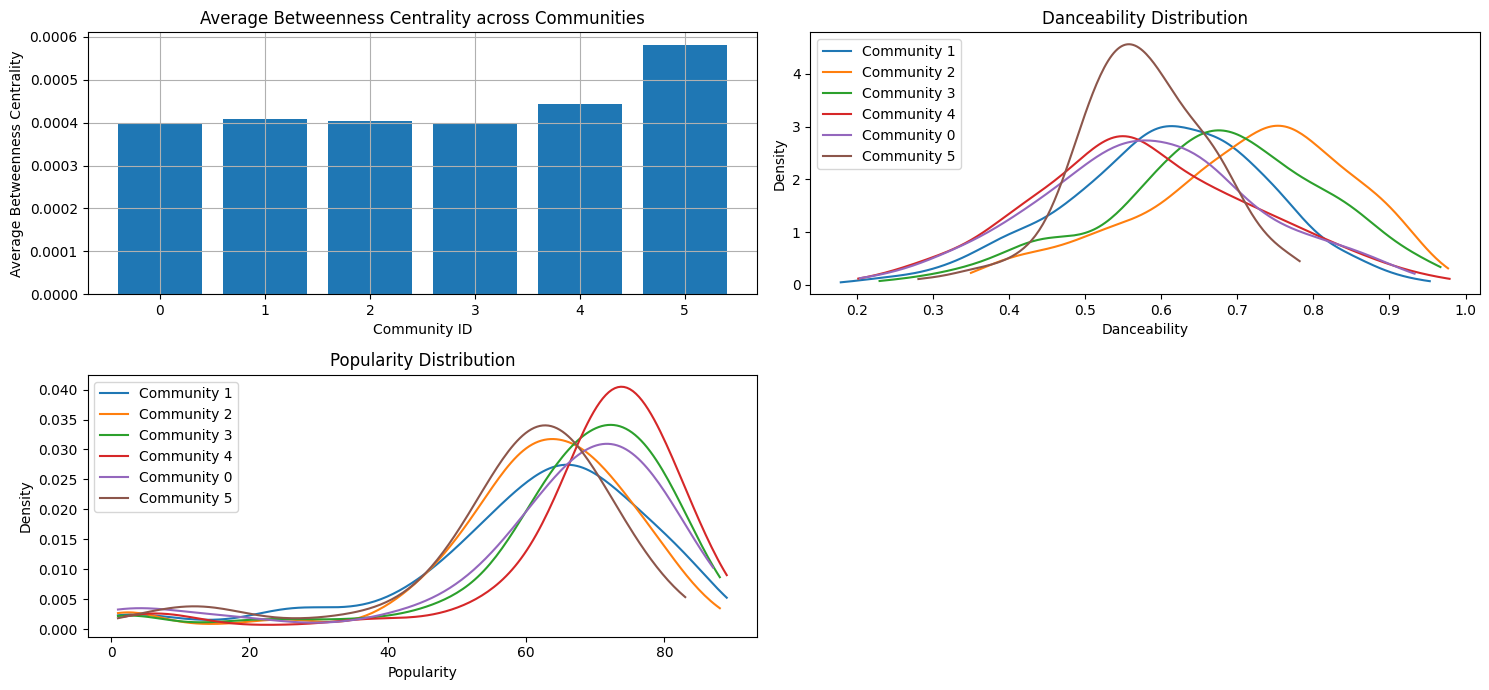

Community 1:
  Top 1: spotify:track:6O6M7pJLABmfBRoGZMu76Y
  Top 2: spotify:track:3CRDbSIZ4r5MsZ0YwxuEkn
  Top 3: spotify:track:7BKLCZ1jbUBVqRi2FVlTVw
Community 2:
  Top 1: spotify:track:1xznGGDReH1oQq0xzbwXa3
  Top 2: spotify:track:2KpCpk6HjXXLb7nnXoXA5O
  Top 3: spotify:track:5aAx2yezTd8zXrkmtKl66Z
Community 3:
  Top 1: spotify:track:5XJJdNPkwmbUwE79gv0NxK
  Top 2: spotify:track:5Q0Nhxo0l2bP3pNjpGJwV1
  Top 3: spotify:track:6C7RJEIUDqKkJRZVWdkfkH
Community 4:
  Top 1: spotify:track:1AhDOtG9vPSOmsWgNW0BEY
  Top 2: spotify:track:1mqlc0vEP9mU1kZgTi6LIQ
  Top 3: spotify:track:4bHsxqR3GMrXTxEPLuK5ue
Community 0:
  Top 1: spotify:track:7oK9VyNzrYvRFo7nQEYkWN
  Top 2: spotify:track:5kNe7PE09d6Kvw5pAsx23n
  Top 3: spotify:track:5CG9Ps5ynNjpKJHmwc95pa
Community 5:
  Top 1: spotify:track:3fqwjXwUGN6vbzIwvyFMhx
  Top 2: spotify:track:4dGJf1SER1T6ooX46vwzRB
  Top 3: spotify:track:0p1BcEcYVO3uk4KDf3gzkY


In [9]:
import networkx as nx
import pickle
import spotipy
import community
import time
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from spotipy.oauth2 import SpotifyClientCredentials

# Load the graph from the pickle file
with open('bigger_graph.pickle', 'rb') as f:
    G = pickle.load(f)

# Spotify API setup
client_credentials_manager = SpotifyClientCredentials(client_id='ba7f324f6d9a47088d10804cdcc6655b', client_secret='536614fbe9ef4a8ab129bed73af0210c')
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Perform Louvain community detection on the graph
partition = community.best_partition(G)

# Organize nodes into communities
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = [node]
    else:
        communities[community_id].append(node)

# Calculate the betweenness centrality for all nodes in the graph
betweenness_centralities = nx.betweenness_centrality(G)

# Dictionary to store the top 3 songs with highest betweenness centrality for each community
top_songs_in_communities = {}

# Iterate through all communities to find top 3 songs with highest betweenness centrality
for community_id, nodes in communities.items():
    top_nodes = sorted(nodes, key=lambda x: betweenness_centralities[x], reverse=True)[:3]
    top_songs_in_communities[community_id] = top_nodes

# Dictionary to store danceability scores for each community
community_danceability = {}

# Iterate through all communities to fetch and store danceability
for community_id, nodes in communities.items():
    danceability_scores = []
    for i in range(0, len(nodes), 100):
        batch = nodes[i:i+100]
        try:
            audio_features_list = spotify.audio_features(batch)
            for audio_features in audio_features_list:
                if audio_features:
                    danceability = audio_features['danceability']
                    danceability_scores.append(danceability)
            time.sleep(30)  # Adjust based on your actual rate limit status
        except spotipy.SpotifyException as e:
            print(f"Failed to fetch audio features for batch starting with track {batch[0] if batch else 'N/A'}: {e}")
    community_danceability[community_id] = danceability_scores

# Dictionary to store popularity scores for each community
community_popularity = {}

# Iterate through all communities to fetch and store popularity
for community_id, nodes in communities.items():
    popularity_scores = []
    for i in range(0, len(nodes), 50):
        batch = nodes[i:i+50]
        try:
            tracks = spotify.tracks(batch)
            for track in tracks['tracks']:
                popularity = track['popularity']
                if popularity > 0:  # Filter out tracks with popularity 0
                    popularity_scores.append(popularity)
            time.sleep(30)  # Adjust based on your actual rate limit status
        except spotipy.SpotifyException as e:
            print(f"Failed to fetch track information for batch starting with track {batch[0] if batch else 'N/A'}: {e}")
    community_popularity[community_id] = popularity_scores

# Calculate the average betweenness centrality for each community
average_betweenness_centralities = {}
for community_id, nodes in communities.items():
    avg_centrality = sum(nx.betweenness_centrality_subset(G, nodes, G.nodes(), normalized=True).values()) / len(nodes)
    average_betweenness_centralities[community_id] = avg_centrality

# Plotting
plt.figure(figsize=(15, 7))

# Plotting Average Betweenness Centrality
plt.subplot(2, 2, 1)
plt.bar(average_betweenness_centralities.keys(), average_betweenness_centralities.values(), align='center')
plt.title("Average Betweenness Centrality across Communities")
plt.xlabel("Community ID")
plt.ylabel("Average Betweenness Centrality")
plt.grid()

# Plotting Danceability
plt.subplot(2, 2, 2)
for community_id, danceability_scores in community_danceability.items():
    density = stats.gaussian_kde(danceability_scores)
    x = np.linspace(min(danceability_scores), max(danceability_scores), 200)
    plt.plot(x, density(x), label=f'Community {community_id}')
plt.title('Danceability Distribution')
plt.xlabel('Danceability')
plt.ylabel('Density')
plt.legend()

# Plotting Popularity
plt.subplot(2, 2, 3)
for community_id, popularity_scores in community_popularity.items():
    density = stats.gaussian_kde(popularity_scores)
    x = np.linspace(min(popularity_scores), max(popularity_scores), 200)
    plt.plot(x, density(x), label=f'Community {community_id}')
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Print top 3 songs with highest betweenness centrality for each community
for community_id, top_songs in top_songs_in_communities.items():
    print(f"Community {community_id}:")
    for idx, song_id in enumerate(top_songs, 1):
        print(f"  Top {idx}: {song_id}")


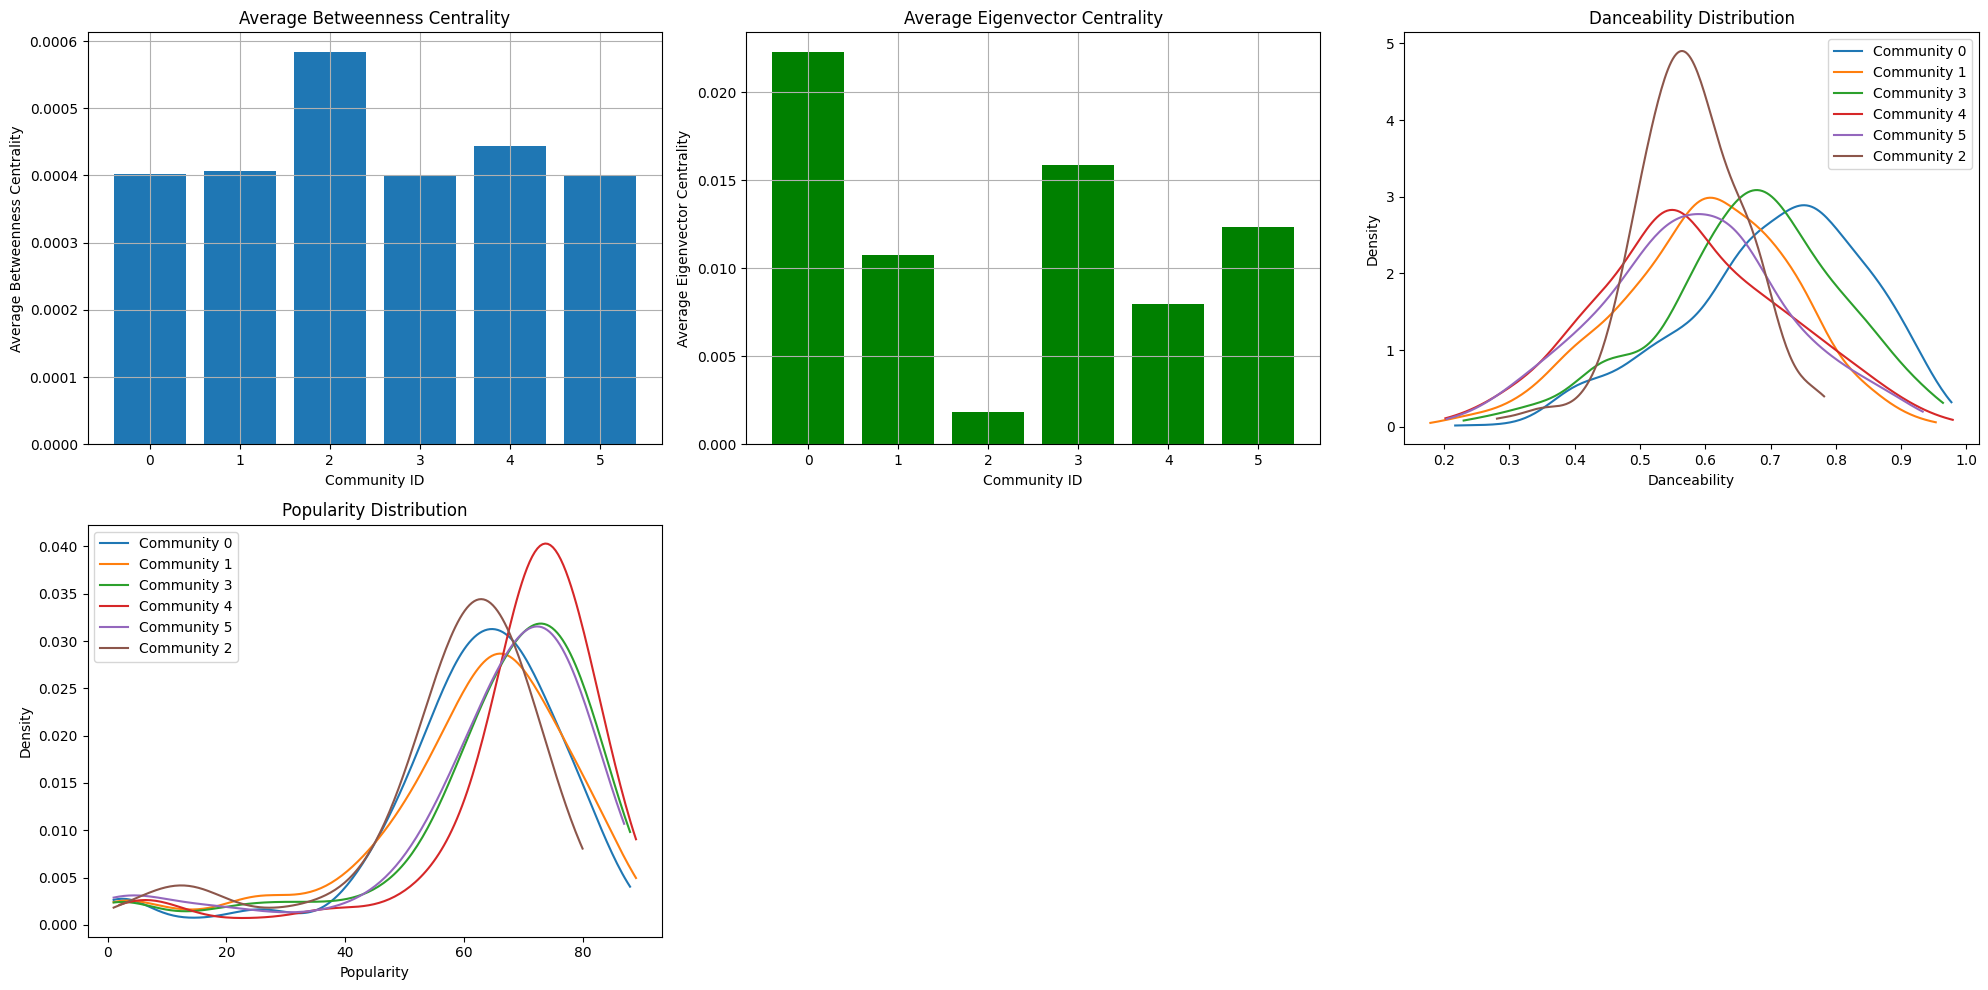

Community 0:
  Top songs by betweenness centrality:
    Top 1: spotify:track:5XJJdNPkwmbUwE79gv0NxK
    Top 2: spotify:track:3fqwjXwUGN6vbzIwvyFMhx
    Top 3: spotify:track:1xznGGDReH1oQq0xzbwXa3
  Top songs by eigenvector centrality:
    Top 1: spotify:track:2KpCpk6HjXXLb7nnXoXA5O
    Top 2: spotify:track:1xznGGDReH1oQq0xzbwXa3
    Top 3: spotify:track:2d8JP84HNLKhmd6IYOoupQ
Community 1:
  Top songs by betweenness centrality:
    Top 1: spotify:track:6O6M7pJLABmfBRoGZMu76Y
    Top 2: spotify:track:3CRDbSIZ4r5MsZ0YwxuEkn
    Top 3: spotify:track:7BKLCZ1jbUBVqRi2FVlTVw
  Top songs by eigenvector centrality:
    Top 1: spotify:track:6O6M7pJLABmfBRoGZMu76Y
    Top 2: spotify:track:7BKLCZ1jbUBVqRi2FVlTVw
    Top 3: spotify:track:6i0V12jOa3mr6uu4WYhUBr
Community 3:
  Top songs by betweenness centrality:
    Top 1: spotify:track:5Q0Nhxo0l2bP3pNjpGJwV1
    Top 2: spotify:track:2y4lAQpi5VTNLu2ldeTdUH
    Top 3: spotify:track:1z6WtY7X4HQJvzxC4UgkSf
  Top songs by eigenvector centrality:
    Top

In [13]:
import networkx as nx
import pickle
import spotipy
import community
import time
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from spotipy.oauth2 import SpotifyClientCredentials

# Load the graph from the pickle file
with open('bigger_graph.pickle', 'rb') as f:
    G = pickle.load(f)

# Spotify API setup
client_credentials_manager = SpotifyClientCredentials(client_id='ba7f324f6d9a47088d10804cdcc6655b', client_secret='536614fbe9ef4a8ab129bed73af0210c')
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Perform Louvain community detection on the graph
partition = community.best_partition(G)

# Organize nodes into communities
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = [node]
    else:
        communities[community_id].append(node)

# Calculate the betweenness centrality for all nodes in the graph
betweenness_centralities = nx.betweenness_centrality(G)

# Calculate the eigenvector centrality for all nodes in the graph
eigenvector_centralities = nx.eigenvector_centrality(G)

# Dictionary to store the top 3 songs with highest betweenness centrality for each community
top_songs_betweenness = {}

# Dictionary to store the top 3 songs with highest eigenvector centrality for each community
top_songs_eigenvector = {}

# Iterate through all communities to find top 3 songs based on betweenness and eigenvector centrality
for community_id, nodes in communities.items():
    top_nodes_betweenness = sorted(nodes, key=lambda x: betweenness_centralities[x], reverse=True)[:3]
    top_nodes_eigenvector = sorted(nodes, key=lambda x: eigenvector_centralities[x], reverse=True)[:3]
    top_songs_betweenness[community_id] = top_nodes_betweenness
    top_songs_eigenvector[community_id] = top_nodes_eigenvector

# Dictionary to store danceability scores for each community
community_danceability = {}

# Dictionary to store popularity scores for each community
community_popularity = {}

# Additional metrics collection (danceability and popularity)
for community_id, nodes in communities.items():
    danceability_scores = []
    popularity_scores = []
    # Fetch danceability
    for i in range(0, len(nodes), 100):
        batch = nodes[i:i+100]
        try:
            audio_features_list = spotify.audio_features(batch)
            for audio_features in audio_features_list:
                if audio_features:
                    danceability_scores.append(audio_features['danceability'])
            time.sleep(30)  # Adjust based on your actual rate limit status
        except spotipy.SpotifyException as e:
            print(f"Failed to fetch audio features for batch starting with track {batch[0] if batch else 'N/A'}: {e}")

    # Fetch popularity
    for i in range(0, len(nodes), 50):
        batch = nodes[i:i+50]
        try:
            tracks = spotify.tracks(batch)
            for track in tracks['tracks']:
                popularity = track['popularity']
                if popularity > 0:  # Filter out tracks with popularity 0
                    popularity_scores.append(popularity)
            time.sleep(30)  # Adjust based on your actual rate limit status
        except spotipy.SpotifyException as e:
            print(f"Failed to fetch track information for batch starting with track {batch[0] if batch else 'N/A'}: {e}")
    
    community_danceability[community_id] = danceability_scores
    community_popularity[community_id] = popularity_scores

# Calculate the average betweenness and eigenvector centrality for each community
average_betweenness_centralities = {}
average_eigenvector_centralities = {}

for community_id, nodes in communities.items():
    avg_betweenness_centrality = sum(nx.betweenness_centrality_subset(G, nodes, G.nodes(), normalized=True).values()) / len(nodes)
    avg_eigenvector_centrality = sum(eigenvector_centralities[node] for node in nodes) / len(nodes)
    
    average_betweenness_centralities[community_id] = avg_betweenness_centrality
    average_eigenvector_centralities[community_id] = avg_eigenvector_centrality

# Plotting
plt.figure(figsize=(20, 10))

# Average Betweenness Centrality
plt.subplot(2, 3, 1)
plt.bar(average_betweenness_centralities.keys(), average_betweenness_centralities.values(), align='center')
plt.title("Average Betweenness Centrality")
plt.xlabel("Community ID")
plt.ylabel("Average Betweenness Centrality")
plt.grid()

# Average Eigenvector Centrality
plt.subplot(2, 3, 2)
plt.bar(average_eigenvector_centralities.keys(), average_eigenvector_centralities.values(), align='center', color='green')
plt.title("Average Eigenvector Centrality")
plt.xlabel("Community ID")
plt.ylabel("Average Eigenvector Centrality")
plt.grid()

# Danceability Distribution
plt.subplot(2, 3, 3)
for community_id, danceability_scores in community_danceability.items():
    density = stats.gaussian_kde(danceability_scores)
    x = np.linspace(min(danceability_scores), max(danceability_scores), 200)
    plt.plot(x, density(x), label=f'Community {community_id}')
plt.title('Danceability Distribution')
plt.xlabel('Danceability')
plt.ylabel('Density')
plt.legend()

# Popularity Distribution
plt.subplot(2, 3, 4)
for community_id, popularity_scores in community_popularity.items():
    density = stats.gaussian_kde(popularity_scores)
    x = np.linspace(min(popularity_scores), max(popularity_scores), 200)
    plt.plot(x, density(x), label=f'Community {community_id}')
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Print top 3 songs based on betweenness and eigenvector centrality for each community
for community_id in communities:
    print(f"Community {community_id}:")
    print("  Top songs by betweenness centrality:")
    for idx, song_id in enumerate(top_songs_betweenness[community_id], 1):
        print(f"    Top {idx}: {song_id}")
    print("  Top songs by eigenvector centrality:")
    for idx, song_id in enumerate(top_songs_eigenvector[community_id], 1):
        print(f"    Top {idx}: {song_id}")



In [7]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


# Spotify API setup
client_credentials_manager = SpotifyClientCredentials(client_id='ba7f324f6d9a47088d10804cdcc6655b', client_secret='536614fbe9ef4a8ab129bed73af0210c')
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

def get_track_data(track_ids):
    track_data = {}
    
    for track_id in track_ids:
        # Remove "spotify:track:" prefix if present in the track_id
        track_id = track_id.split(':')[-1]
        
        # Fetch track details
        track = spotify.track(track_id)
        audio_features = spotify.audio_features(track_id)[0]
        
        # Extract relevant data
        track_data[track_id] = {
            'audio_features': {
                'energy': audio_features['energy'],
                'valence': audio_features['valence'],

            },
            'genres': spotify.artist(track['artists'][0]['id'])['genres']
        }
    
    return track_data

#Combine all the top 3 tracks by betweenness centrality from all communities
all_top_betweenness_tracks = [
    '5XJJdNPkwmbUwE79gv0NxK', '3fqwjXwUGN6vbzIwvyFMhx', '1xznGGDReH1oQq0xzbwXa3',  # Community 0
    '6O6M7pJLABmfBRoGZMu76Y', '3CRDbSIZ4r5MsZ0YwxuEkn', '7BKLCZ1jbUBVqRi2FVlTVw',  # Community 1
    '4dGJf1SER1T6ooX46vwzRB', '2TR7A4ulH9R1PNwMyd8o8U', '0p1BcEcYVO3uk4KDf3gzkY',  # Community 2
    '5Q0Nhxo0l2bP3pNjpGJwV1', '2y4lAQpi5VTNLu2ldeTdUH', '1z6WtY7X4HQJvzxC4UgkSf',  # Community 3
    '1AhDOtG9vPSOmsWgNW0BEY', '1mqlc0vEP9mU1kZgTi6LIQ', '4bHsxqR3GMrXTxEPLuK5ue',  # Community 4
    '7oK9VyNzrYvRFo7nQEYkWN', '5kNe7PE09d6Kvw5pAsx23n', '5CG9Ps5ynNjpKJHmwc95pa'   # Community 5
]
Community0_top_betweeness  = ['5XJJdNPkwmbUwE79gv0NxK', '3fqwjXwUGN6vbzIwvyFMhx', '1xznGGDReH1oQq0xzbwXa3' ]
Community1_top_betweeness  = ['6O6M7pJLABmfBRoGZMu76Y', '3CRDbSIZ4r5MsZ0YwxuEkn', '7BKLCZ1jbUBVqRi2FVlTVw' ]
Community2_top_betweeness  = [ '4dGJf1SER1T6ooX46vwzRB', '2TR7A4ulH9R1PNwMyd8o8U', '0p1BcEcYVO3uk4KDf3gzkY']
Community3_top_betweeness  = [ '5Q0Nhxo0l2bP3pNjpGJwV1', '2y4lAQpi5VTNLu2ldeTdUH', '1z6WtY7X4HQJvzxC4UgkSf']
Community4_top_betweeness  = [ '1AhDOtG9vPSOmsWgNW0BEY', '1mqlc0vEP9mU1kZgTi6LIQ', '4bHsxqR3GMrXTxEPLuK5ue']
Community5_top_betweeness  = [ '7oK9VyNzrYvRFo7nQEYkWN', '5kNe7PE09d6Kvw5pAsx23n', '5CG9Ps5ynNjpKJHmwc95pa']
all_top_eigenvector_tracks = [ 
    'spotify:track:2KpCpk6HjXXLb7nnXoXA5O', 'spotify:track:1xznGGDReH1oQq0xzbwXa3', 'spotify:track:2d8JP84HNLKhmd6IYOoupQ',  # Community 0
    'spotify:track:6O6M7pJLABmfBRoGZMu76Y', 'spotify:track:7BKLCZ1jbUBVqRi2FVlTVw', 'spotify:track:6i0V12jOa3mr6uu4WYhUBr',  # Community 1
    'spotify:track:2FviG1Ma0M0BSZbqaDvw0x', 'spotify:track:0p1BcEcYVO3uk4KDf3gzkY', 'spotify:track:7vWGeYZJUzBXKGPro05UXS',  # Community 2
    'spotify:track:5Q0Nhxo0l2bP3pNjpGJwV1', 'spotify:track:6RcQOut9fWL6FSqeIr5M1r', 'spotify:track:4gFXY5yvHayGckJndafYQE',  # Community 3
    '1mqlc0vEP9mU1kZgTi6LIQ', '1AhDOtG9vPSOmsWgNW0BEY', '78WVLOP9pN0G3gRLFy1rAa',  # Community 4
    '7oK9VyNzrYvRFo7nQEYkWN', '494OU6M7NOf4ICYb4zWCf5', '5pfJsMwoRYKampPay8amX0'   # Community 5
]
Community0_top_eigenvector  = [ 'spotify:track:2KpCpk6HjXXLb7nnXoXA5O', 'spotify:track:1xznGGDReH1oQq0xzbwXa3', 'spotify:track:2d8JP84HNLKhmd6IYOoupQ']
Community1_top_eigenvector  = ['spotify:track:6O6M7pJLABmfBRoGZMu76Y', 'spotify:track:7BKLCZ1jbUBVqRi2FVlTVw', 'spotify:track:6i0V12jOa3mr6uu4WYhUBr' ]
Community2_top_eigenvector  = ['spotify:track:2FviG1Ma0M0BSZbqaDvw0x', 'spotify:track:0p1BcEcYVO3uk4KDf3gzkY', 'spotify:track:7vWGeYZJUzBXKGPro05UXS' ]
Community3_top_eigenvector  = ['spotify:track:5Q0Nhxo0l2bP3pNjpGJwV1', 'spotify:track:6RcQOut9fWL6FSqeIr5M1r', 'spotify:track:4gFXY5yvHayGckJndafYQE' ]
Community4_top_eigenvector  = ['1mqlc0vEP9mU1kZgTi6LIQ', '1AhDOtG9vPSOmsWgNW0BEY', '78WVLOP9pN0G3gRLFy1rAa']
Community5_top_eigenvector  = ['7oK9VyNzrYvRFo7nQEYkWN', '494OU6M7NOf4ICYb4zWCf5', '5pfJsMwoRYKampPay8amX0']
# Fetch track data 
print("Betweeness Community 0:")
Community0_top_betweeness_info = get_track_data(Community0_top_betweeness)
print(Community0_top_betweeness_info)
print("Betweeness Community 1:")
Community1_top_betweeness_info = get_track_data(Community1_top_betweeness)
print(Community2_top_betweeness_info)
print("Betweeness Community 2:")
Community2_top_betweeness_info = get_track_data(Community2_top_betweeness)
print(Community2_top_betweeness_info)
print("Betweeness Community 3:")
Community3_top_betweeness_info = get_track_data(Community3_top_betweeness)
print(Community3_top_betweeness_info)
print("Betweeness Community 4:")
Community4_top_betweeness_info = get_track_data(Community4_top_betweeness)
print(Community4_top_betweeness_info)
print("Betweeness Community 5:")
Community5_top_betweeness_info = get_track_data(Community5_top_betweeness)
print(Community5_top_betweeness_info)
# Fetch track data for eigenvector centralitys
eigenvector_track_data = get_track_data(all_top_eigenvector_tracks)
print("EigenVector Community 0:")
Community0_top_eigenvector_info = get_track_data(Community0_top_eigenvector)
print(Community0_top_eigenvector_info)
print("EigenVector Community 1:")
Community1_top_eigenvector_info = get_track_data(Community1_top_eigenvector)
print(Community1_top_eigenvector_info)
print("EigenVector Community 2:")
Community2_top_eigenvector_info = get_track_data(Community2_top_eigenvector)
print(Community2_top_eigenvector_info)
print("EigenVector Community 3:")
Community3_top_eigenvector_info = get_track_data(Community3_top_eigenvector)
print(Community3_top_eigenvector_info)
print("EigenVector Community 4:")
Community4_top_eigenvector_info = get_track_data(Community4_top_eigenvector)
print(Community4_top_eigenvector_info)
print("EigenVector Community 5:")
Community5_top_eigenvector_info = get_track_data(Community5_top_eigenvector)
print(Community5_top_eigenvector_info)

all_genres = []

communities_betweenness_info = [Community0_top_betweeness_info, Community1_top_betweeness_info, Community2_top_betweeness_info, Community3_top_betweeness_info, Community4_top_betweeness_info, Community5_top_betweeness_info]

communities_eigenvector_info = [Community0_top_eigenvector_info, Community1_top_eigenvector_info, Community2_top_eigenvector_info, Community3_top_eigenvector_info, Community4_top_eigenvector_info, Community5_top_eigenvector_info]



Betweeness Community 0:
{'5XJJdNPkwmbUwE79gv0NxK': {'audio_features': {'energy': 0.696, 'valence': 0.625}, 'genres': ['chicago rap', 'hip hop', 'rap']}, '3fqwjXwUGN6vbzIwvyFMhx': {'audio_features': {'energy': 0.37, 'valence': 0.512}, 'genres': ['contemporary country', 'outlaw country']}, '1xznGGDReH1oQq0xzbwXa3': {'audio_features': {'energy': 0.619, 'valence': 0.371}, 'genres': ['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap']}}
Betweeness Community 1:
{'4dGJf1SER1T6ooX46vwzRB': {'audio_features': {'energy': 0.713, 'valence': 0.807}, 'genres': ['contemporary country', 'country', 'country road', 'modern country rock']}, '2TR7A4ulH9R1PNwMyd8o8U': {'audio_features': {'energy': 0.931, 'valence': 0.723}, 'genres': ['contemporary country', 'country', 'country pop', 'country road', 'modern country rock']}, '0p1BcEcYVO3uk4KDf3gzkY': {'audio_features': {'energy': 0.476, 'valence': 0.3}, 'genres': ['contemporary country', 'country', 'country road', 'modern country rock']}}
Betwee

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['0', '0', '0', '1', '1', '1', '2', '2', '2', '3', '3', '3', '4', '4', '4', '5', '5', '5', '0', '0', '0', '1', '1', '1', '2', '2', '2', '3', '3', '3', '4', '4', '4', '5', '5', '5']

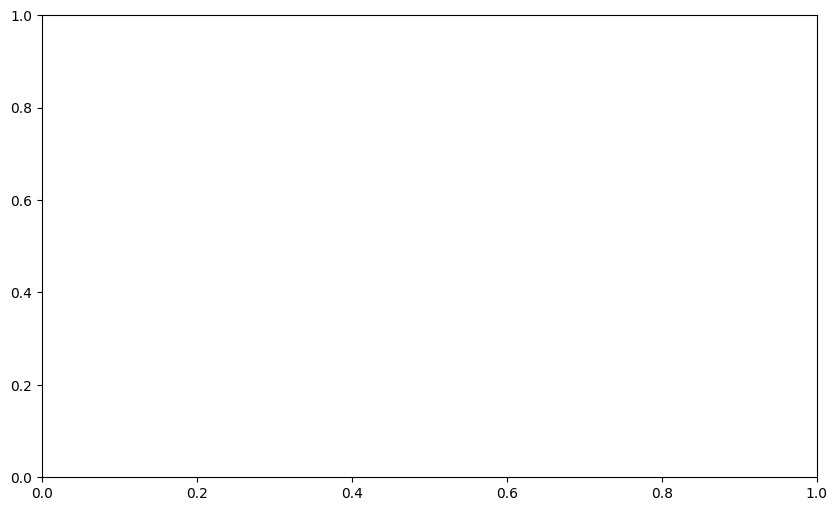

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


# Spotify API setup
client_credentials_manager = SpotifyClientCredentials(client_id='ba7f324f6d9a47088d10804cdcc6655b', client_secret='536614fbe9ef4a8ab129bed73af0210c')
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

def get_track_data(track_ids):
    track_data = {}
    
    for track_id in track_ids:
        # Remove "spotify:track:" prefix if present in the track_id
        track_id = track_id.split(':')[-1]
        
        # Fetch track details
        track = spotify.track(track_id)
        audio_features = spotify.audio_features(track_id)[0]
        
        # Extract relevant data
        track_data[track_id] = {
            'audio_features': {
                'energy': audio_features['energy'],
                'valence': audio_features['valence'],

            },
            'genres': spotify.artist(track['artists'][0]['id'])['genres']
        }
    
    return track_data

# Combine all the top 3 tracks by betweenness centrality from all communities
all_top_betweenness_tracks = [
    '5XJJdNPkwmbUwE79gv0NxK', '3fqwjXwUGN6vbzIwvyFMhx', '1xznGGDReH1oQq0xzbwXa3',  # Community 0
    '6O6M7pJLABmfBRoGZMu76Y', '3CRDbSIZ4r5MsZ0YwxuEkn', '7BKLCZ1jbUBVqRi2FVlTVw',  # Community 1
    '4dGJf1SER1T6ooX46vwzRB', '2TR7A4ulH9R1PNwMyd8o8U', '0p1BcEcYVO3uk4KDf3gzkY',  # Community 2
    '5Q0Nhxo0l2bP3pNjpGJwV1', '2y4lAQpi5VTNLu2ldeTdUH', '1z6WtY7X4HQJvzxC4UgkSf',  # Community 3
    '1AhDOtG9vPSOmsWgNW0BEY', '1mqlc0vEP9mU1kZgTi6LIQ', '4bHsxqR3GMrXTxEPLuK5ue',  # Community 4
    '7oK9VyNzrYvRFo7nQEYkWN', '5kNe7PE09d6Kvw5pAsx23n', '5CG9Ps5ynNjpKJHmwc95pa'   # Community 5
]
Community0_top_betweeness  = ['5XJJdNPkwmbUwE79gv0NxK', '3fqwjXwUGN6vbzIwvyFMhx', '1xznGGDReH1oQq0xzbwXa3' ]
Community1_top_betweeness  = ['6O6M7pJLABmfBRoGZMu76Y', '3CRDbSIZ4r5MsZ0YwxuEkn', '7BKLCZ1jbUBVqRi2FVlTVw' ]
Community2_top_betweeness  = [ '4dGJf1SER1T6ooX46vwzRB', '2TR7A4ulH9R1PNwMyd8o8U', '0p1BcEcYVO3uk4KDf3gzkY']
Community3_top_betweeness  = [ '5Q0Nhxo0l2bP3pNjpGJwV1', '2y4lAQpi5VTNLu2ldeTdUH', '1z6WtY7X4HQJvzxC4UgkSf']
Community4_top_betweeness  = [ '1AhDOtG9vPSOmsWgNW0BEY', '1mqlc0vEP9mU1kZgTi6LIQ', '4bHsxqR3GMrXTxEPLuK5ue']
Community5_top_betweeness  = [ '7oK9VyNzrYvRFo7nQEYkWN', '5kNe7PE09d6Kvw5pAsx23n', '5CG9Ps5ynNjpKJHmwc95pa']
all_top_eigenvector_tracks = [ 
    'spotify:track:2KpCpk6HjXXLb7nnXoXA5O', 'spotify:track:1xznGGDReH1oQq0xzbwXa3', 'spotify:track:2d8JP84HNLKhmd6IYOoupQ',  # Community 0
    'spotify:track:6O6M7pJLABmfBRoGZMu76Y', 'spotify:track:7BKLCZ1jbUBVqRi2FVlTVw', 'spotify:track:6i0V12jOa3mr6uu4WYhUBr',  # Community 1
    'spotify:track:2FviG1Ma0M0BSZbqaDvw0x', 'spotify:track:0p1BcEcYVO3uk4KDf3gzkY', 'spotify:track:7vWGeYZJUzBXKGPro05UXS',  # Community 2
    'spotify:track:5Q0Nhxo0l2bP3pNjpGJwV1', 'spotify:track:6RcQOut9fWL6FSqeIr5M1r', 'spotify:track:4gFXY5yvHayGckJndafYQE',  # Community 3
    '1mqlc0vEP9mU1kZgTi6LIQ', '1AhDOtG9vPSOmsWgNW0BEY', '78WVLOP9pN0G3gRLFy1rAa',  # Community 4
    '7oK9VyNzrYvRFo7nQEYkWN', '494OU6M7NOf4ICYb4zWCf5', '5pfJsMwoRYKampPay8amX0'   # Community 5
]
Community0_top_eigenvector  = [ 'spotify:track:2KpCpk6HjXXLb7nnXoXA5O', 'spotify:track:1xznGGDReH1oQq0xzbwXa3', 'spotify:track:2d8JP84HNLKhmd6IYOoupQ']
Community1_top_eigenvector  = ['spotify:track:6O6M7pJLABmfBRoGZMu76Y', 'spotify:track:7BKLCZ1jbUBVqRi2FVlTVw', 'spotify:track:6i0V12jOa3mr6uu4WYhUBr' ]
Community2_top_eigenvector  = ['spotify:track:2FviG1Ma0M0BSZbqaDvw0x', 'spotify:track:0p1BcEcYVO3uk4KDf3gzkY', 'spotify:track:7vWGeYZJUzBXKGPro05UXS' ]
Community3_top_eigenvector  = ['spotify:track:5Q0Nhxo0l2bP3pNjpGJwV1', 'spotify:track:6RcQOut9fWL6FSqeIr5M1r', 'spotify:track:4gFXY5yvHayGckJndafYQE' ]
Community4_top_eigenvector  = ['1mqlc0vEP9mU1kZgTi6LIQ', '1AhDOtG9vPSOmsWgNW0BEY', '78WVLOP9pN0G3gRLFy1rAa']
Community5_top_eigenvector  = ['7oK9VyNzrYvRFo7nQEYkWN', '494OU6M7NOf4ICYb4zWCf5', '5pfJsMwoRYKampPay8amX0']
# Fetch track data 
print("Betweeness Community 0:")
Community0_top_betweeness_info = get_track_data(Community0_top_betweeness)
print(Community0_top_betweeness_info)
print("Betweeness Community 1:")
Community1_top_betweeness_info = get_track_data(Community1_top_betweeness)
print(Community2_top_betweeness_info)
print("Betweeness Community 2:")
Community2_top_betweeness_info = get_track_data(Community2_top_betweeness)
print(Community2_top_betweeness_info)
print("Betweeness Community 3:")
Community3_top_betweeness_info = get_track_data(Community3_top_betweeness)
print(Community3_top_betweeness_info)
print("Betweeness Community 4:")
Community4_top_betweeness_info = get_track_data(Community4_top_betweeness)
print(Community4_top_betweeness_info)
print("Betweeness Community 6:")
Community5_top_betweeness_info = get_track_data(Community5_top_betweeness)
print(Community5_top_betweeness_info)

all_genres = []

communities_betweenness_info = [Community0_top_betweeness_info, Community1_top_betweeness_info, Community2_top_betweeness_info, Community3_top_betweeness_info, Community4_top_betweeness_info, Community5_top_betweeness_info]




Betweeness Community 0:
{'5XJJdNPkwmbUwE79gv0NxK': {'audio_features': {'energy': 0.696, 'valence': 0.625}, 'genres': ['chicago rap', 'hip hop', 'rap']}, '3fqwjXwUGN6vbzIwvyFMhx': {'audio_features': {'energy': 0.37, 'valence': 0.512}, 'genres': ['contemporary country', 'outlaw country']}, '1xznGGDReH1oQq0xzbwXa3': {'audio_features': {'energy': 0.619, 'valence': 0.371}, 'genres': ['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap']}}
Betweeness Community 1:
{'4dGJf1SER1T6ooX46vwzRB': {'audio_features': {'energy': 0.713}, 'genres': ['contemporary country', 'country', 'country road', 'modern country rock']}, '2TR7A4ulH9R1PNwMyd8o8U': {'audio_features': {'energy': 0.931}, 'genres': ['contemporary country', 'country', 'country pop', 'country road', 'modern country rock']}, '0p1BcEcYVO3uk4KDf3gzkY': {'audio_features': {'energy': 0.476}, 'genres': ['contemporary country', 'country', 'country road', 'modern country rock']}}
Betweeness Community 2:
{'4dGJf1SER1T6ooX46vwzRB': {'audio